In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42) # repro
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 120)

In [3]:
# series
s = pd.Series([10, 20, 30], index=["a","b","c"])
print("Series:\n", s)

Series:
 a    10
b    20
c    30
dtype: int64


In [4]:
# simple dataframe

df = pd.DataFrame({
    "id": np.arange(1, 11),
    "category": np.random.choice(["A","B","C"], size=10),
    "subcat": np.random.choice(["X","Y"], size=10),
    "value": np.random.randn(10).round(3)*10 + 50,
    "count": np.random.randint(1, 100, size=10),
    "date": pd.date_range("2024-01-01", periods=10, freq="D")
})
df.head()

,id,category,subcat,value,count,date
0,1,C,X,44.19,80,2024-01-01
1,2,A,X,44.75,15,2024-01-02
2,3,C,Y,44.29,62,2024-01-03
3,4,C,X,40.76,62,2024-01-04
4,5,A,Y,23.87,47,2024-01-05


In [5]:
display(df.head())

,id,category,subcat,value,count,date
0,1,C,X,44.19,80,2024-01-01
1,2,A,X,44.75,15,2024-01-02
2,3,C,Y,44.29,62,2024-01-03
3,4,C,X,40.76,62,2024-01-04
4,5,A,Y,23.87,47,2024-01-05


In [6]:
display(df.tail(3))


,id,category,subcat,value,count,date
7,8,B,X,34.76,55,2024-01-08
8,9,C,Y,45.72,64,2024-01-09
9,10,C,X,42.58,3,2024-01-10


In [7]:
display(df.sample(3, random_state=0))


,id,category,subcat,value,count,date
2,3,C,Y,44.29,62,2024-01-03
8,9,C,Y,45.72,64,2024-01-09
4,5,A,Y,23.87,47,2024-01-05


In [8]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        10 non-null     int64         
 1   category  10 non-null     object        
 2   subcat    10 non-null     object        
 3   value     10 non-null     float64       
 4   count     10 non-null     int64         
 5   date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 612.0+ bytes


None

In [10]:
display(df.describe())


,id,value,count,date
count,10.00000,10.000000,10.000000,10
mean,5.50000,43.858000,50.100000,2024-01-05 12:00:00
min,1.00000,23.870000,3.000000,2024-01-01 00:00:00
25%,3.25000,41.215000,48.000000,2024-01-03 06:00:00
50%,5.50000,44.240000,58.500000,2024-01-05 12:00:00
75%,7.75000,45.477500,62.000000,2024-01-07 18:00:00
max,10.00000,59.500000,80.000000,2024-01-10 00:00:00
std,3.02765,10.259432,23.562918,NaN


In [11]:
display(df["value"].head())      # Series


,value
0,44.19
1,44.75
2,44.29
3,40.76
4,23.87


In [12]:
display(df[["category","value"]].head())  # DataFrame


,category,value
0,C,44.19
1,A,44.75
2,C,44.29
3,C,40.76
4,A,23.87


In [13]:
display(df.iloc[0:3, :])         # first 3 rows, all cols


,id,category,subcat,value,count,date
0,1,C,X,44.19,80,2024-01-01
1,2,A,X,44.75,15,2024-01-02
2,3,C,Y,44.29,62,2024-01-03


In [14]:
display(df.loc[0:3, ["id","value"]])  # rows by labels (inclusive end), selected cols


,id,value
0,1,44.19
1,2,44.75
2,3,44.29
3,4,40.76


In [20]:
# loc is inclusive on the end point -- note
d = df.loc[0:4, ["id", "category", "value"]]
print(d)
print(type(d))

   id category  value
0   1        C  44.19
1   2        A  44.75
2   3        C  44.29
3   4        C  40.76
4   5        A  23.87
<class 'pandas.core.frame.DataFrame'>


In [17]:
mask = (df["value"] > 50) & (df["count"] < 50)
display(df[mask])

,id,category,subcat,value,count,date


In [19]:
# copy,create new columns in a couple different ways

df2 = df.copy()
df2["value_z"] = (df2["value"] - df2["value"].mean())/df2["value"].std()
df2["is_big"] = (df2["value"] > df2["value"].mean() + 2*df2["value"].std())
print("Display 1\n")
display(df2.head())
df2 = df2.assign(value_sq = df2["value"]**2)
print("Display 2\n")
display(df2.head())

# With .where to keep shape
df2["value_pos"] = df2["value"].where(df2["value"] > 0, other=np.nan)
df2.head()

Display 1



,id,category,subcat,value,count,date,value_z,is_big
0,1,C,X,44.19,80,2024-01-01,0.032360,False
1,2,A,X,44.75,15,2024-01-02,0.086944,False
2,3,C,Y,44.29,62,2024-01-03,0.042108,False
3,4,C,X,40.76,62,2024-01-04,-0.301966,False
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False


Display 2



,id,category,subcat,value,count,date,value_z,is_big,value_sq
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625
2,3,C,Y,44.29,62,2024-01-03,0.042108,False,1961.6041
3,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769


,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561,44.19
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75
2,3,C,Y,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29
3,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776,40.76
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87


In [22]:
# basics of missing data #

df3 = df2.copy()
df3.loc[[2,5], "subcat"] = np.nan
display(df3.isna().sum())
df3["subcat_filled"] = df3["subcat"].fillna("MISSING")
df3["value_filled"] = df3["value"].fillna(df3["value"].median())
df3.head(7)

,0
id,0
category,0
subcat,2
value,0
count,0
date,0
value_z,0
is_big,0
value_sq,0
value_pos,0


,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561,44.19,X,44.19
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75
2,3,C,NaN,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29,MISSING,44.29
3,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776,40.76,X,40.76
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87,Y,23.87
5,6,A,NaN,59.50,62,2024-01-06,1.524646,False,3540.2500,59.50,MISSING,59.50
6,7,C,Y,58.16,51,2024-01-07,1.394034,False,3382.5856,58.16,Y,58.16


In [23]:
# string and datertime manips

# .str
df4 = df3.copy()
df4["cat_lower"] = df4["category"].str.lower()
df4["cat_flag"] = df4["category"].str.contains("A")
display(df4[["category","cat_lower","cat_flag"]].head())

# .dt
df4["year"] = df4["date"].dt.year
df4["dow"] = df4["date"].dt.day_name()
df4[["date","year","dow"]].head()

,category,cat_lower,cat_flag
0,C,c,False
1,A,a,True
2,C,c,False
3,C,c,False
4,A,a,True


,date,year,dow
0,2024-01-01,2024,Monday
1,2024-01-02,2024,Tuesday
2,2024-01-03,2024,Wednesday
3,2024-01-04,2024,Thursday
4,2024-01-05,2024,Friday


In [24]:
# sort, rank, dedupe

# sort

display(df4.sort_values(["value","count"], ascending=[False, True]).head())

,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow
5,6,A,NaN,59.50,62,2024-01-06,1.524646,False,3540.2500,59.50,MISSING,59.50,a,True,2024,Saturday
6,7,C,Y,58.16,51,2024-01-07,1.394034,False,3382.5856,58.16,Y,58.16,c,False,2024,Sunday
8,9,C,Y,45.72,64,2024-01-09,0.181492,False,2090.3184,45.72,Y,45.72,c,False,2024,Tuesday
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75,a,True,2024,Tuesday
2,3,C,NaN,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29,MISSING,44.29,c,False,2024,Wednesday


In [25]:
# rank
display(df4.nlargest(3, "value"))


,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow
5,6,A,NaN,59.50,62,2024-01-06,1.524646,False,3540.2500,59.50,MISSING,59.50,a,True,2024,Saturday
6,7,C,Y,58.16,51,2024-01-07,1.394034,False,3382.5856,58.16,Y,58.16,c,False,2024,Sunday
8,9,C,Y,45.72,64,2024-01-09,0.181492,False,2090.3184,45.72,Y,45.72,c,False,2024,Tuesday


In [26]:
display(df4.nsmallest(3, "count"))


,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow
9,10,C,X,42.58,3,2024-01-10,-0.124568,False,1813.0564,42.58,X,42.58,c,False,2024,Wednesday
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75,a,True,2024,Tuesday
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87,Y,23.87,a,True,2024,Friday


In [27]:
# duplicate data first

dup = pd.concat([df4.iloc[:3], df4.iloc[:3], df4.iloc[3:6]], ignore_index=True)
display(dup.duplicated().head(10))

,0
0,False
1,False
2,False
3,True
4,True
5,True
6,False
7,False
8,False


In [28]:
display(dup.drop_duplicates().head(10))


,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561,44.19,X,44.19,c,False,2024,Monday
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75,a,True,2024,Tuesday
2,3,C,NaN,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29,MISSING,44.29,c,False,2024,Wednesday
6,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776,40.76,X,40.76,c,False,2024,Thursday
7,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87,Y,23.87,a,True,2024,Friday
8,6,A,NaN,59.50,62,2024-01-06,1.524646,False,3540.2500,59.50,MISSING,59.50,a,True,2024,Saturday


In [29]:
# GroupBy -- aggregate, transform, filter


In [30]:
#agg

g = df4.groupby(["category","subcat_filled"], dropna=False)
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [31]:
agg = g.agg(
    n=("id","count"),
    mean_value=("value","mean"),
    sum_count=("count","sum")
).reset_index()
display(agg)

,category,subcat_filled,n,mean_value,sum_count
0,A,MISSING,1,59.50,62
1,A,X,1,44.75,15
2,A,Y,1,23.87,47
3,B,X,1,34.76,55
4,C,MISSING,1,44.29,62
5,C,X,3,42.51,145
6,C,Y,2,51.94,115


In [32]:
# Named aggregation + multiple funcs
agg2 = df4.groupby("category").agg(
    value_mean=("value","mean"),
    value_std=("value","std"),
    count_sum=("count","sum")
)
display(agg2)

,value_mean,value_std,count_sum
category,,,
A,42.706667,17.902671,124
B,34.760000,NaN,55
C,45.950000,6.217446,322


In [33]:
# transform keeps shape (broadcasts group statistic)
df4["value_centered_by_cat"] = df4["value"] - df4.groupby("category")["value"].transform("mean")
df4[["category","value","value_centered_by_cat"]].head(10)

,category,value,value_centered_by_cat
0,C,44.19,-1.760000
1,A,44.75,2.043333
2,C,44.29,-1.660000
3,C,40.76,-5.190000
4,A,23.87,-18.836667
5,A,59.50,16.793333
6,C,58.16,12.210000
7,B,34.76,0.000000
8,C,45.72,-0.230000
9,C,42.58,-3.370000


In [34]:
# Pivot tables, crosstabs #

In [35]:
pt = pd.pivot_table(
    df4,
    index="category",
    columns="subcat_filled",
    values="value",
    aggfunc="mean",
    margins=True
)
display(pt)


subcat_filled,MISSING,X,Y,All
category,,,,
A,59.500,44.750,23.870000,42.706667
B,NaN,34.760,NaN,34.760000
C,44.290,42.510,51.940000,45.950000
All,51.895,41.408,42.583333,43.858000


In [36]:
ct = pd.crosstab(df4["category"], df4["subcat_filled"], margins=True, normalize="index")
display(ct.round(3))

subcat_filled,MISSING,X,Y
category,,,
A,0.333,0.333,0.333
B,0.000,1.000,0.000
C,0.167,0.500,0.333
All,0.200,0.500,0.300


In [37]:
# reshaping, melt, stack / unstack #

In [38]:
wide = df4.pivot(index="id", columns="subcat_filled", values="value")
display(wide.head())

subcat_filled,MISSING,X,Y
id,,,
1,NaN,44.19,NaN
2,NaN,44.75,NaN
3,44.29,NaN,NaN
4,NaN,40.76,NaN
5,NaN,NaN,23.87


In [39]:
long = wide.reset_index().melt(id_vars="id", var_name="subcat", value_name="value")
display(long.head())

,id,subcat,value
0,1,MISSING,NaN
1,2,MISSING,NaN
2,3,MISSING,44.29
3,4,MISSING,NaN
4,5,MISSING,NaN


In [40]:
# MultiIndex stack/unstack
stacked = wide.stack()       # -> long Series with MultiIndex (id, subcat)
unstacked = stacked.unstack()
display(stacked.head())
display(unstacked.head())

,,0
id,subcat_filled,
1,X,44.19
2,X,44.75
3,MISSING,44.29
4,X,40.76
5,Y,23.87


subcat_filled,MISSING,X,Y
id,,,
1,NaN,44.19,NaN
2,NaN,44.75,NaN
3,44.29,NaN,NaN
4,NaN,40.76,NaN
5,NaN,NaN,23.87


In [41]:
# Joins / merges #

In [42]:
# Build small lookup tables
cats = pd.DataFrame({
    "category": ["A","B","C"],
    "cat_desc": ["Alpha", "Beta", "Gamma"]
})
subcats = pd.DataFrame({
    "subcat_filled": ["X","Y","MISSING"],
    "sub_desc": ["Ex", "Why", "Unknown"]
})

In [43]:
cats

,category,cat_desc
0,A,Alpha
1,B,Beta
2,C,Gamma


In [44]:
subcats

,subcat_filled,sub_desc
0,X,Ex
1,Y,Why
2,MISSING,Unknown


In [45]:
merged = df4.merge(cats, on="category", how="left").merge(subcats, on="subcat_filled", how="left")
display(merged.head())

,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow,value_centered_by_cat,cat_desc,sub_desc
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561,44.19,X,44.19,c,False,2024,Monday,-1.760000,Gamma,Ex
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75,a,True,2024,Tuesday,2.043333,Alpha,Ex
2,3,C,NaN,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29,MISSING,44.29,c,False,2024,Wednesday,-1.660000,Gamma,Unknown
3,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776,40.76,X,40.76,c,False,2024,Thursday,-5.190000,Gamma,Ex
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87,Y,23.87,a,True,2024,Friday,-18.836667,Alpha,Why


In [46]:

# Index-based join
lookup = cats.set_index("category")
display(df4.join(lookup, on="category").head())

,id,category,subcat,value,count,date,value_z,is_big,value_sq,value_pos,subcat_filled,value_filled,cat_lower,cat_flag,year,dow,value_centered_by_cat,cat_desc
0,1,C,X,44.19,80,2024-01-01,0.032360,False,1952.7561,44.19,X,44.19,c,False,2024,Monday,-1.760000,Gamma
1,2,A,X,44.75,15,2024-01-02,0.086944,False,2002.5625,44.75,X,44.75,a,True,2024,Tuesday,2.043333,Alpha
2,3,C,NaN,44.29,62,2024-01-03,0.042108,False,1961.6041,44.29,MISSING,44.29,c,False,2024,Wednesday,-1.660000,Gamma
3,4,C,X,40.76,62,2024-01-04,-0.301966,False,1661.3776,40.76,X,40.76,c,False,2024,Thursday,-5.190000,Gamma
4,5,A,Y,23.87,47,2024-01-05,-1.948256,False,569.7769,23.87,Y,23.87,a,True,2024,Friday,-18.836667,Alpha


In [47]:
# datetime indexes, resampling, rolling windows for time series averages etc #

In [48]:
# Make a time series (daily) with noise
ts = pd.DataFrame({
    "date": pd.date_range("2024-01-01", periods=120, freq="D"),
    "y": np.sin(np.linspace(0, 6*np.pi, 120)) + np.random.randn(120)*0.2
})
ts = ts.set_index("date")
display(ts.head())

,y
date,
2024-01-01,0.083402
2024-01-02,0.324230
2024-01-03,0.252847
2024-01-04,0.451548
2024-01-05,0.611074


In [50]:
# Resample monthly mean
display(ts.resample("ME").mean())

,y
date,
2024-01-31,0.186637
2024-02-29,0.231046
2024-03-31,-0.134850
2024-04-30,-0.271805


In [51]:
# Rolling mean (7-day)
ts["y_roll7"] = ts["y"].rolling(7, min_periods=1).mean()
ts.head(12)

,y,y_roll7
date,,
2024-01-01,0.083402,0.083402
2024-01-02,0.324230,0.203816
2024-01-03,0.252847,0.220160
2024-01-04,0.451548,0.278007
2024-01-05,0.611074,0.344620
...,...,...
2024-01-08,0.888525,0.594074
2024-01-09,0.804451,0.662677
2024-01-10,0.833801,0.745670


In [52]:
# Apply, map, replace, np.select #

In [54]:
df5 = df4.copy()
df5["category_cat"] = df5["category"].astype("category")
df5["subcat_cat"] = df5["subcat_filled"].astype("category")
display(df5.dtypes)

# Convert numerics safely
df5["value_num"] = pd.to_numeric(df5["value"], errors="coerce")
df5.info()

# map / replace for label encoding
map_dict = {"A": 0, "B": 1, "C": 2}
df6 = df5.copy()
df6["cat_code"] = df6["category"].map(map_dict)

,0
id,int64
category,object
subcat,object
value,float64
count,int64
...,...
year,int32
dow,object
value_centered_by_cat,float64
category_cat,category


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     10 non-null     int64         
 1   category               10 non-null     object        
 2   subcat                 8 non-null      object        
 3   value                  10 non-null     float64       
 4   count                  10 non-null     int64         
 5   date                   10 non-null     datetime64[ns]
 6   value_z                10 non-null     float64       
 7   is_big                 10 non-null     bool          
 8   value_sq               10 non-null     float64       
 9   value_pos              10 non-null     float64       
 10  subcat_filled          10 non-null     object        
 11  value_filled           10 non-null     float64       
 12  cat_lower              10 non-null     object        
 13  cat_flag

In [55]:
# apply row-wise (use sparingly; vectorize when possible)
df6["score"] = df6.apply(lambda r: r["value"]*0.6 + r["count"]*0.4, axis=1)


In [56]:
# np.select for multi-conditions
conds = [
    df6["value"] >= df6["value"].quantile(0.66),
    df6["value"] >= df6["value"].quantile(0.33)
]

In [57]:
choices = ["high", "mid"]
df6["value_band"] = np.select(conds, choices, default="low")
df6[["category","value","count","value_band","score"]].head(10)

,category,value,count,value_band,score
0,C,44.19,80,mid,58.514
1,A,44.75,15,high,32.850
2,C,44.29,62,mid,51.374
3,C,40.76,62,low,49.256
4,A,23.87,47,low,33.122
5,A,59.50,62,high,60.500
6,C,58.16,51,high,55.296
7,B,34.76,55,low,42.856
8,C,45.72,64,high,53.032
9,C,42.58,3,mid,26.748


In [58]:
# concat and append parts

part1 = df6.iloc[:5].copy()
part2 = df6.iloc[5:].copy()
combined = pd.concat([part1, part2], ignore_index=True)
display(combined.equals(df6.reset_index(drop=True)))

True

In [60]:
# Row-wise add with keys
combo_keys = pd.concat({"top": part1, "bottom": part2})
combo_keys.head(10)

id category subcat  value  count       date   value_z  is_big   value_sq  value_pos  ... cat_flag  year  \
top    0   1        C      X  44.19     80 2024-01-01  0.032360   False  1952.7561      44.19  ...    False  2024   
       1   2        A      X  44.75     15 2024-01-02  0.086944   False  2002.5625      44.75  ...     True  2024   
       2   3        C    NaN  44.29     62 2024-01-03  0.042108   False  1961.6041      44.29  ...    False  2024   
       3   4        C      X  40.76     62 2024-01-04 -0.301966   False  1661.3776      40.76  ...    False  2024   
       4   5        A      Y  23.87     47 2024-01-05 -1.948256   False   569.7769      23.87  ...     True  2024   
bottom 5   6        A    NaN  59.50     62 2024-01-06  1.524646   False  3540.2500      59.50  ...     True  2024   
       6   7        C      Y  58.16     51 2024-01-07  1.394034   False  3382.5856      58.16  ...    False  2024   
       7   8        B      X  34.76     55 2024-01-08 -0.886794   False  1208.2576      34.76  ...    False  2024   
       8   9        C      Y  45.72     64 2024-01-09  0.181492   False  2090.3184      45.72  ...    False  2024   
       9  10        C      X  42.58      3 2024-01-10 -0.124568   False  1813.0564      42.58  ...    False  2024   

                dow  value_centered_by_cat  category_cat subcat_cat  value_num cat_code   score  value_band  
top    0     Monday              -1.760000             C          X      44.19        2  58.514         mid  
       1    Tuesday               2.043333             A          X      44.75        0  32.850        high  
       2  Wednesday              -1.660000             C    MISSING      44.29        2  51.374         mid  
       3   Thursday              -5.190000             C          X      40.76        2  49.256         low  
       4     Friday             -18.836667             A          Y      23.87        0  33.122         low  
bottom 5   Saturday              16.793333             A    MISSING      59.50        0  60.500        high  
       6     Sunday              12.210000             C          Y      58.16        2  55.296        high  
       7     Monday               0.000000             B          X      34.76        1  42.856         low  
       8    Tuesday              -0.230000             C          Y      45.72        2  53.032        high  
       9  Wednesday              -3.370000             C          X      42.58        2  26.748         mid  

[10 rows x 23 columns]

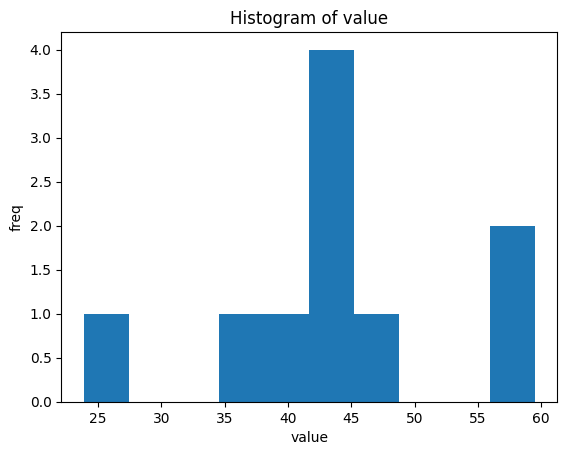

<Figure size 640x480 with 0 Axes>

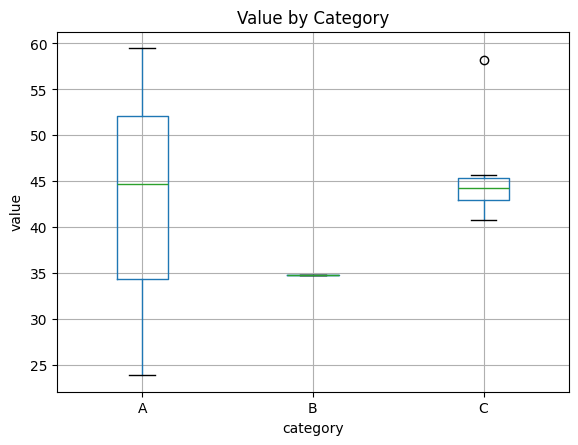

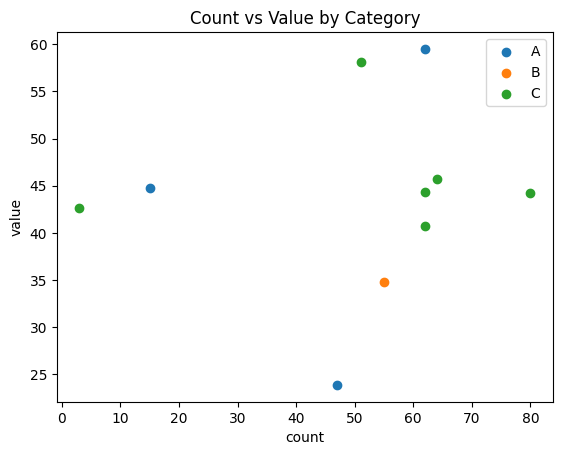

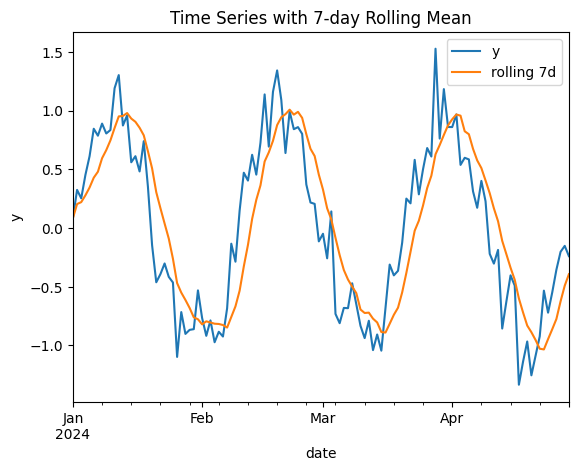

In [61]:
# 1) Histogram of value
plt.figure()
plt.hist(df6["value"], bins=10)
plt.title("Histogram of value")
plt.xlabel("value"); plt.ylabel("freq")
plt.show()

# 2) Boxplot by category
plt.figure()
df6.boxplot(column="value", by="category")
plt.suptitle("")
plt.title("Value by Category")
plt.xlabel("category"); plt.ylabel("value")
plt.show()

# 3) Scatter: value vs count colored by category
plt.figure()
for cat, sub in df6.groupby("category"):
    plt.scatter(sub["count"], sub["value"], label=cat)
plt.legend()
plt.title("Count vs Value by Category")
plt.xlabel("count"); plt.ylabel("value")
plt.show()

# 4) Time series + rolling mean
plt.figure()
ts["y"].plot(label="y")
ts["y_roll7"].plot(label="rolling 7d")
plt.legend()
plt.title("Time Series with 7-day Rolling Mean")
plt.xlabel("date"); plt.ylabel("y")
plt.show()


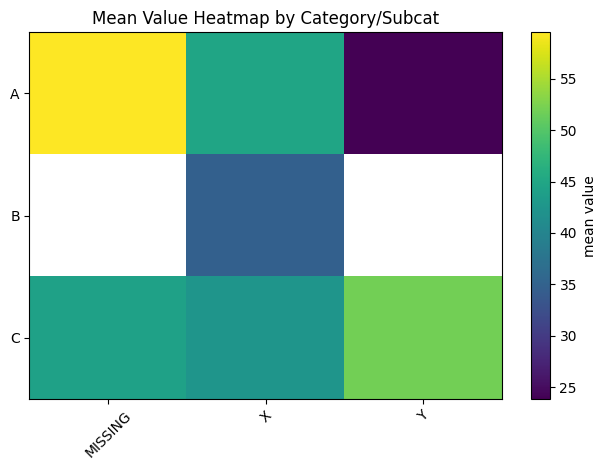

In [62]:
heat = pd.pivot_table(df6, index="category", columns="subcat_filled", values="value", aggfunc="mean")
plt.figure()
plt.imshow(heat, aspect="auto")
plt.colorbar(label="mean value")
plt.yticks(range(len(heat.index)), heat.index)
plt.xticks(range(len(heat.columns)), heat.columns, rotation=45)
plt.title("Mean Value Heatmap by Category/Subcat")
plt.tight_layout()
plt.show()
